In [56]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [57]:
class ErrMethod:

    h_arr = np.array([2/2**n for n in range(1,21)])

    def __init__(self, method_name: str, method_func):
        self.mthd_name = method_name # название используемого численного метода 
        self.mthd_func = method_func # численный метод

    def GetErr(self, point, h, analitic_func):
        x = sp.Symbol('x')

        analitic_function = sp.lambdify(x, analitic_func)
        diff_analitic_function = sp.lambdify(x, sp.diff(analitic_func))
        
        return abs(diff_analitic_function(point) - self.mthd_func(analitic_function, point, h))

    def PlotErr(self, point, analitic_func):
        err = np.array([])
        for h in self.h_arr:
            err = np.append(err, self.GetErr(point, h, analitic_func))

        plt.scatter(self.h_arr, err, color='red', marker='o', s=8, alpha=1)
        plt.plot(self.h_arr, err, color='black', alpha=0.75, lw=1.5, ls='-')

In [58]:
class GraphErr:

    def __init__(self, function, err_method_map):
        self.function = function # аналитическая функция
        self.mthd_map = err_method_map # набор численных методов

    def Plot(self, point):
        for meth in self.mthd_map:
            meth.PlotErr(point, self.function)

    def BestMeth(self):
        pass

In [59]:
x = sp.Symbol('x')
func_map = {"sin(x^2)" : sp.sin(x ** 2), 
            "cos(sin(x))" : sp.cos(sp.sin(x)), 
            "exp(sin(cos(x)))" : sp.exp(sp.sin(sp.cos(x))), 
            "ln(x + 3)" : sp.log(x + 3),
            "(x + 3)^(0,5)" : (x + 3) ** (1/2)}

In [60]:
def meth1(f, x, h):
    return (f(x + h) - f(x)) / h

def meth2(f, x, h):
    return (f(x) - f(x - h)) / h

def meth3(f, x, h):
    return (f(x + h) - f(x - h)) / 2*h

mthd_map = np.array([ErrMethod('method1', meth1), ErrMethod('meth2', meth2), ErrMethod('meth3', meth3)])

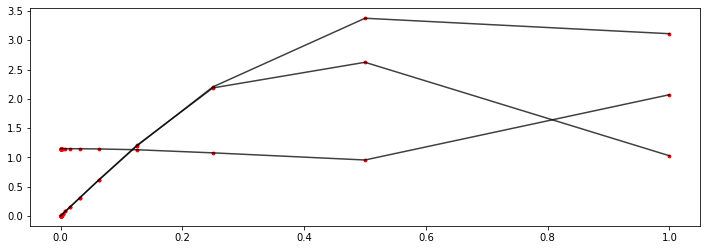

In [61]:
graph_obj1 = GraphErr(func_map["sin(x^2)"], mthd_map)

plt.figure(figsize=[12, 4])

graph_obj1.Plot(2.23)